Epoch 0/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 100/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 200/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 300/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 400/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 500/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 600/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 700/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 800/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086
Epoch 900/1000 - RMSE: 38991.6354 - R2: 0.7615 - MAE: 24020.6086


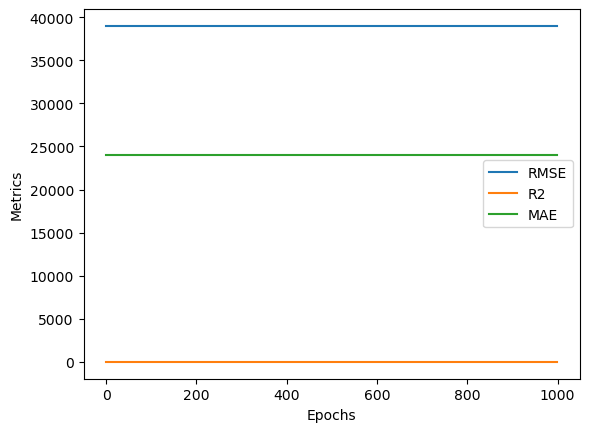

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class CustomLinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

# Load the training data
train_data = pd.read_csv('train.csv')

# Fill NA/NaN values using the specified method
train_data.fillna(method='ffill', inplace=True)

# Convert categorical variable into dummy/indicator variables
train_data = pd.get_dummies(train_data)

# Separate target variable from the rest of the data
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

# Normalize numerical features
numerical_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X_train[numerical_cols] = (X_train[numerical_cols] - X_train[numerical_cols].mean()) / X_train[numerical_cols].std()

# Create a CustomLinearRegression object
custom_lr = CustomLinearRegression(learning_rate=0.01, n_iters=1000)

# Lists to store metrics for each epoch
epochs_list = []
rmse_list = []
r2_list = []
mae_list = []

# Training loop
for epoch in range(custom_lr.n_iters):
    # Fit the model to the training data
    custom_lr.fit(X_train.to_numpy(), y_train.to_numpy())

    # Make predictions on the test data
    predictions = custom_lr.predict(X_train.to_numpy())

    # Compute the RMSE
    rmse = np.sqrt(np.mean((predictions - y_train.to_numpy())**2))
    rmse_list.append(rmse)

    # Calculate R-squared manually
    mean_y = np.mean(y_train.to_numpy())
    total_sum_of_squares = np.sum((y_train.to_numpy() - mean_y)**2)
    residual_sum_of_squares = np.sum((y_train.to_numpy() - predictions)**2)
    r2_manual = 1 - (residual_sum_of_squares / total_sum_of_squares)
    r2_list.append(r2_manual)

    # Calculate MAE manually
    mae_manual = np.mean(np.abs(y_train.to_numpy() - predictions))
    mae_list.append(mae_manual)

    # Print metrics for every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{custom_lr.n_iters} - RMSE: {rmse:.4f} - R2: {r2_manual:.4f} - MAE: {mae_manual:.4f}')

    epochs_list.append(epoch)

# Plot the cost over epochs
plt.plot(epochs_list, rmse_list, label='RMSE')
plt.plot(epochs_list, r2_list, label='R2')
plt.plot(epochs_list, mae_list, label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()
